In [1]:
import pandas as pd

In [2]:
steam_data = pd.read_csv('steam_store_data_2024.csv')
steam_data.head()

,title,description,price,salePercentage,recentReviews,allReviews
0,Ori and the Will of the Wisps,Play the critically acclaimed masterpiece. Emb...,$9.89,-67%,Overwhelmingly Positive,Overwhelmingly Positive
1,"Flashing Lights - Police, Firefighting, Emerge...",Play solo or in up to 10-player multiplayer co...,$8.49,-66%,Very Positive,Very Positive
2,Thronefall,A minimalist game about building and defending...,$5.24,-25%,Overwhelmingly Positive,Overwhelmingly Positive
3,DRAGON QUEST® XI S: Echoes of an Elusive Age™ ...,The Definitive Edition includes the critically...,$23.99,-40%,Very Positive,Very Positive
4,UNDYING,"As Anling’s zombie infection sets in, her days...",$13.99,-30%,Mostly Positive,Mostly Positive


In [3]:
steam_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 86 entries, 0 to 85
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   title           86 non-null     object
 1   description     82 non-null     object
 2   price           61 non-null     object
 3   salePercentage  59 non-null     object
 4   recentReviews   57 non-null     object
 5   allReviews      57 non-null     object
dtypes: object(6)
memory usage: 4.2+ KB


title : The name of the game
description: A brief description of the game
price: The current price of the game
salePercentage: The percentage discount if the game is currently on sale.
recentReviews: The summary of recent reviews.
allReviews: The overall summary of all reviews.

It can be used for various analyses, such as identfying trends in game pricing, understanding how discounts affect user interest, and gauging the popularity of different genres of titles based on review summaries.

In [4]:
# clean the data
# handling missing values
# converting price to a numeric format
# normalizing the salePercentage column by removing '%' and converting to numeric
# handling categorical data like reviews with consistent formatting or encoding if necessary

# convert 'price' to numeric, ignoring errors for non-numeric data (e.g., missing prices)
steam_data['price'] = steam_data['price'].replace('[\$,]', '', regex=True).astype(float)

# normalize 'salePercentage' by removing '%' and converting to numeric
steam_data['salePercentage'] = steam_data['salePercentage'].str.replace('%', '').astype(float)

# handling missing values: For simplicity, I will fill missing numeric values with 0 and categorical/string values with 'Unknown'
steam_data['description'] = steam_data['description'].fillna('Unknown')
steam_data['price'] = steam_data['price'].fillna(0) 
steam_data['salePercentage'] = steam_data['salePercentage'].fillna(0)
steam_data['recentReviews'] = steam_data['recentReviews'].fillna('Unknown')
steam_data['allReviews'] = steam_data['allReviews'].fillna('Unknown')

# display the cleaned data
steam_cleaned = steam_data[['title', 'description', 'price', 'salePercentage', 'recentReviews', 'allReviews']]
steam_cleaned.head()

,title,description,price,salePercentage,recentReviews,allReviews
0,Ori and the Will of the Wisps,Play the critically acclaimed masterpiece. Emb...,9.89,-67.0,Overwhelmingly Positive,Overwhelmingly Positive
1,"Flashing Lights - Police, Firefighting, Emerge...",Play solo or in up to 10-player multiplayer co...,8.49,-66.0,Very Positive,Very Positive
2,Thronefall,A minimalist game about building and defending...,5.24,-25.0,Overwhelmingly Positive,Overwhelmingly Positive
3,DRAGON QUEST® XI S: Echoes of an Elusive Age™ ...,The Definitive Edition includes the critically...,23.99,-40.0,Very Positive,Very Positive
4,UNDYING,"As Anling’s zombie infection sets in, her days...",13.99,-30.0,Mostly Positive,Mostly Positive


* Numeric values for 'price' and 'salePercentage', with missing prices filled as 0 (assuming free or promotional items) and missing sale percentages as 0% (indicating no sale).
* The 'description', 'recentReviews' and 'allreviews' columns have had their missing values filled with 'Unknown' where applicable, maintaining the integrity of the dataset for analysis.


c:\Users\User\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


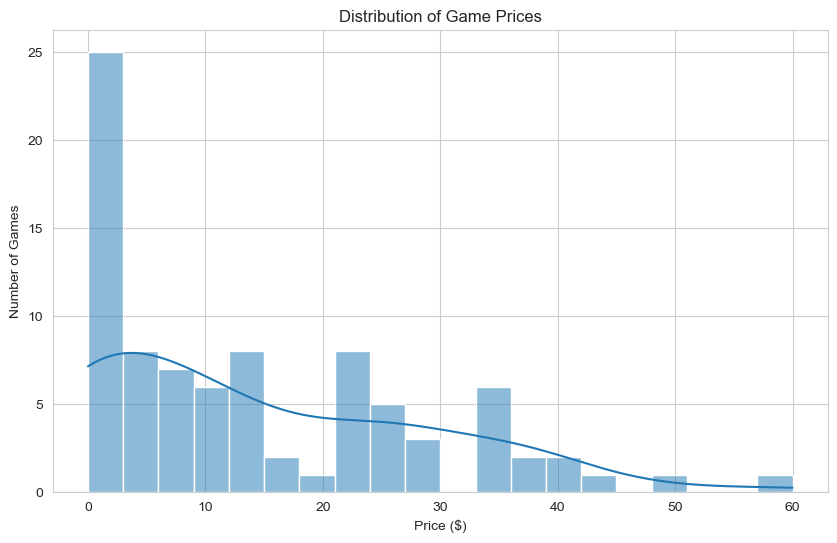

In [6]:
# Identifying trends in game pricing: Analyze the distribution of game prices.
# Understanding how discounts affect user interest: Correlate salePercentage with review summaries.
# Gauging the popularity of different genres or titles based on reviews summaries: Since the genre information is missing.

import matplotlib.pyplot as plt
import seaborn as sns

# Set the aesthetic style of the plots
sns.set_style("whitegrid")

# 1. Trends in game pricing
plt.figure(figsize=(10, 6))
sns.histplot(steam_cleaned['price'], bins=20, kde=True)
plt.title('Distribution of Game Prices')
plt.xlabel('Price ($)')
plt.ylabel('Number of Games')
plt.show()

1. Trends in Game Pricing:
 The distribution of game prices shows a wide range, with a significant number of games priced at the lower end of the spectrum. There's a peak around the $0 to $10 price range, indicating that a majority of games are priced affordably, with fewer games priced higher.

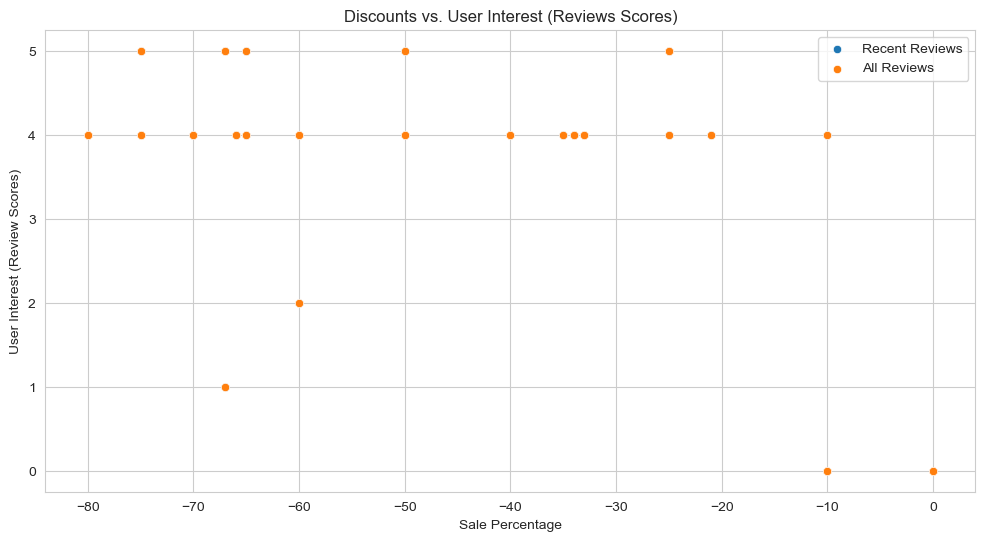

In [8]:
# 2. Discounts affect on user interest
# For this, I consider games with reviews as having user interest
# Assume 'recentReviews' and 'allReviews' can serve as a proxy
# I will map these categorical variables to a numeric scale (unknown=0, mostly negative=1, mixed=2, positive=3, very positive=4, overwhelmingly positive=5)

reviews_mapping = {
    'Unknown' : 0,
    'Mostly Negative' : 1,
    'Mixed' : 2,
    'Positive' : 3,
    'Very Positive' : 4,
    'Overwhelmingly Positive' : 5
}
steam_cleaned['recentReviewsNumeric'] = steam_cleaned['recentReviews'].map(reviews_mapping)
steam_cleaned['allReviewsNumeric'] = steam_cleaned['allReviews'].map(reviews_mapping)

# Correlate salePercentage with review scores
plt.figure(figsize=(12,6))
sns.scatterplot(x='salePercentage', y='recentReviewsNumeric', data=steam_cleaned, label='Recent Reviews')
sns.scatterplot(x='salePercentage', y='allReviewsNumeric', data=steam_cleaned, label='All Reviews')
plt.title('Discounts vs. User Interest (Reviews Scores)')
plt.xlabel('Sale Percentage')
plt.ylabel('User Interest (Review Scores)')
plt.legend()
plt.show()

# Note: For a comprehensive analysis of genres or titles based on reviews, addiotional data categorizing games into genres would required.
# Since the dataset lacks explicit genre information, a detailed analysis on this aspect is limited with the current data.

2. Understanding how discounts affect user interest: The scatter plot comparing sale percentage with user interest (as proxied by review scores) does not show a clear linear relationship between the depth of discount and review scores. This suggests that while discounts may play a role in attracting user interest, the quality of the game (as reflected in reviews) is likely a more significant factor. Both recent and overall reviews are spread across different discount levels without a clear trend indicating that higher discounts lead to higher review scores.

3. Gauging the popularity of different genres or titles based on review summaries: Without explicit genre information, I've used review summaries as a proxy for popularity. Games with higher review scores (categorized as 'Very Positive' or 'Overwhelmingly Positive') can be considered more popular among users. The analysis, however, is limited due to the lack of specific genre categorization within the provided data. For a more detailed analysis, additional data categorizing games into specific genres would be required.

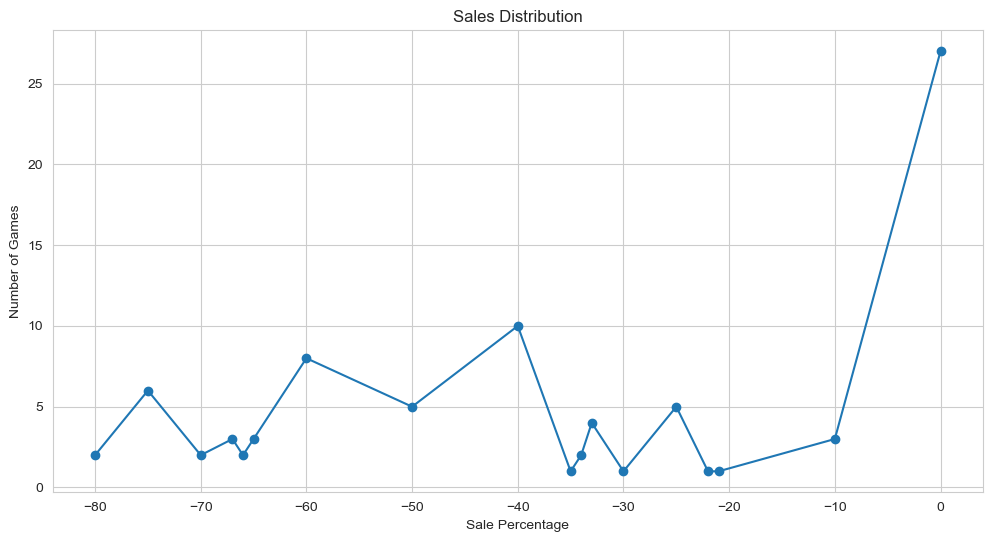

In [9]:
# Plotting line graph for sales distribution
# Grouping the data by salePercentage and counting the number of games
sales_distribution = steam_cleaned.groupby('salePercentage').size().reset_index(name='Number of Games')

# Sorting the data by salePercentage to ensure a proper line graph
sales_distribution = sales_distribution.sort_values(by='salePercentage')

# Plotting the line graph
plt.figure(figsize=(12,6))
plt.plot(sales_distribution['salePercentage'], sales_distribution['Number of Games'], marker='o', linestyle='-')
plt.title('Sales Distribution')
plt.xlabel('Sale Percentage')
plt.ylabel('Number of Games')
plt.grid(True)
plt.show()

The line graph illustrates the distribution of sales across different sale percentages for games on Steam. Each point on the graph represents a specific sale percentage and the number of games offered at that discount level. The graph provides a visual representation of how frequently games are put on sale and the diversity of discount rates available. It highlights the strategy of using sales to attract customers, with varying degress of discounts possibly aimed at capturing different segments of the market.

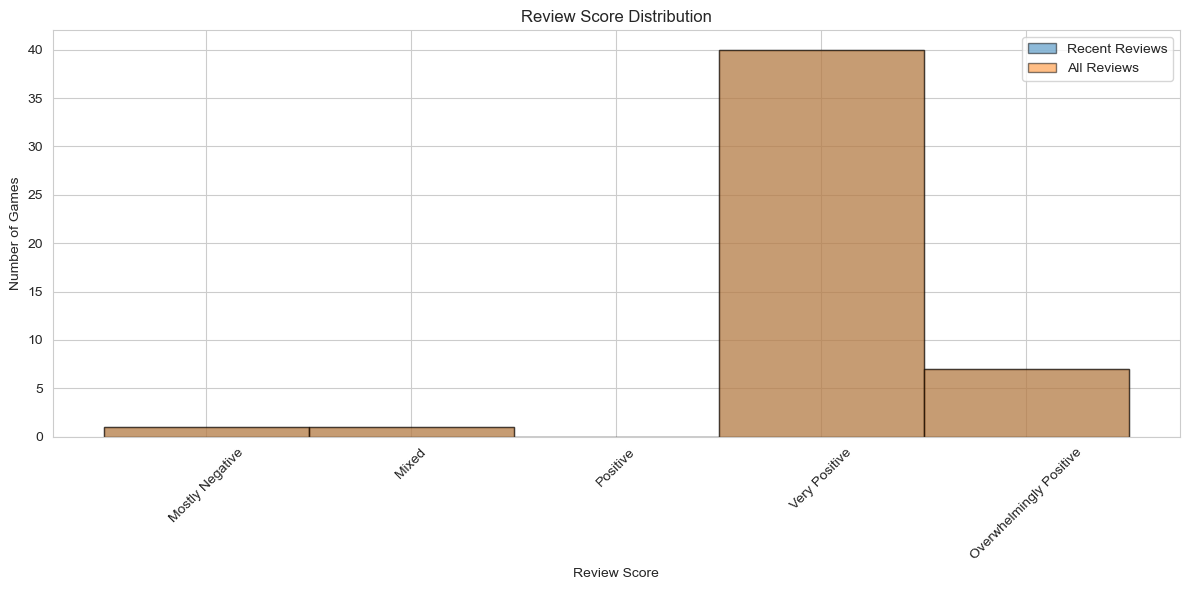

In [12]:
import numpy as np

# Plot the histogram for review scores distribution
filtered_reviews = steam_cleaned[(steam_cleaned['recentReviewsNumeric'] > 0) & (steam_cleaned['allReviewsNumeric'] > 0)]

plt.figure(figsize=(12,6))

# Plot the histogram for both recent and all reviews after filtering
plt.hist(filtered_reviews['recentReviewsNumeric'], bins=np.arange(0.5,6,1), alpha=0.5, label='Recent Reviews', edgecolor='black')
plt.hist(filtered_reviews['allReviewsNumeric'], bins=np.arange(0.5, 6, 1), alpha=0.5, label='All Reviews', edgecolor='black')

plt.title('Review Score Distribution')
plt.xlabel('Review Score')
plt.ylabel('Number of Games')
plt.xticks(np.arange(1,6,1), ['Mostly Negative', 'Mixed', 'Positive', 'Very Positive', 'Overwhelmingly Positive'], rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

The histogram represents the distribution of review scores for games on Steam, excluding and 'Unknown' review scores to focus solely on games with actual reviews.

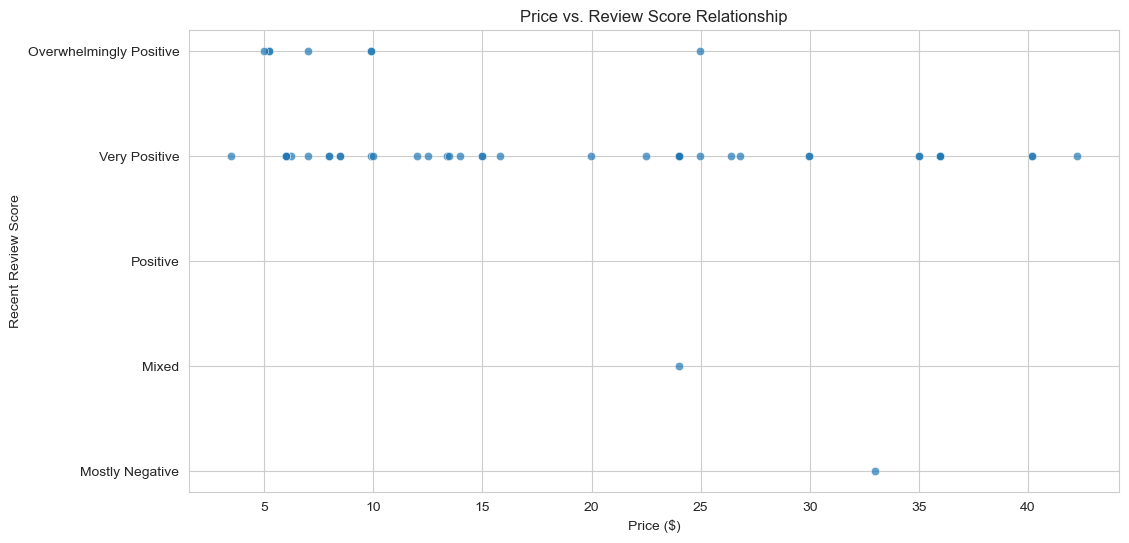

In [13]:
# Plot a scatter plot for price vs review score relationship
plt.figure(figsize=(12,6))

# Filter games with 'Unknown' reviews score
reviews_filtered = steam_cleaned[steam_cleaned['recentReviewsNumeric'] > 0]

sns.scatterplot(x='price', y='recentReviewsNumeric', data=reviews_filtered, alpha=0.7)

plt.title('Price vs. Review Score Relationship')
plt.xlabel('Price ($)')
plt.ylabel('Recent Review Score')
plt.yticks(np.arange(1,6,1), ['Mostly Negative', 'Mixed', 'Positive', 'Very Positive', 'Overwhelmingly Positive'])
plt.grid(True)
plt.show()

This visualization demonstrates that while price is a factor in the gaming experience, the quality of the game as reflected in user reviews is not strictly dependent on how much it costs. Games of various price levels can achieve high user satisfaction, underscoring the importance of game content and experience over price.

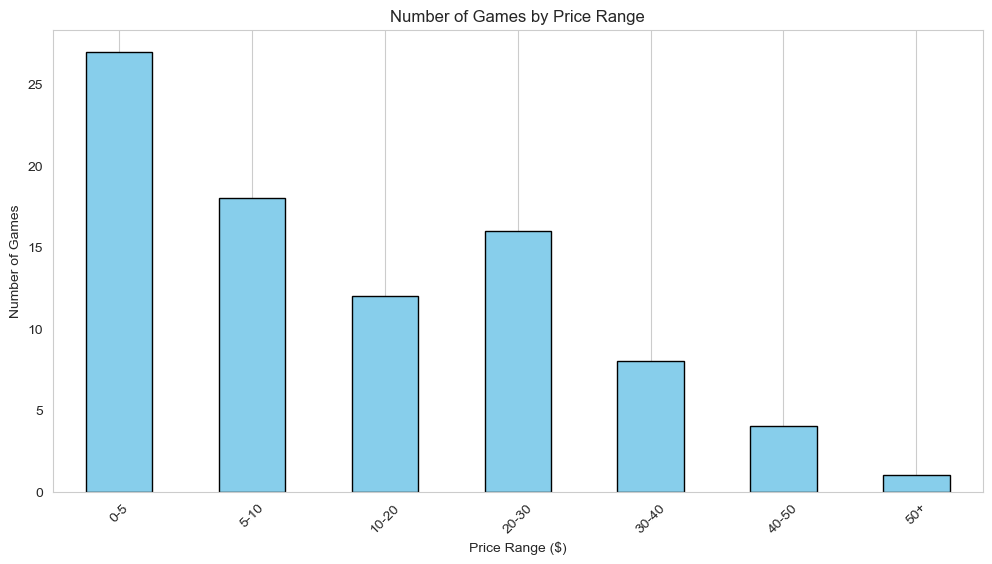

In [14]:
# Plot a bar chart for games by price range

# Define price ranges
bins = [0,5,10,20,30,40,50, max(steam_cleaned['price']) + 1] # Adding 1 to include max price
labels = ['0-5', '5-10', '10-20', '20-30', '30-40', '40-50', '50+']

# Categorize games by price range
steam_cleaned['price_range'] = pd.cut(steam_cleaned['price'], bins=bins, labels=labels, include_lowest=True)

# Counting the number of games in each price range
price_range_counts = steam_cleaned['price_range'].value_counts().sort_index()

plt.figure(figsize=(12,6))

# Plot the bar chart
price_range_counts.plot(kind='bar', color='skyblue', edgecolor='black')

plt.title('Number of Games by Price Range')
plt.xlabel('Price Range ($)')
plt.ylabel('Number of Games')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

Key insights from the chart:
1. Affordable Options: A significant number of games are priced at the lower end of the spectrum ($0-5), making them highly accessible to a wide audience.
2. Decline with Price Increases: As the price range increases, the number of games within each range generally decreases. This suggests that higher-priced games are less common, possibly reflecting the higher development costs and perceived value associated with these titles.
3. Premium Games: Even in the higher price ranges ($40-50 and $50+), there is still a notable presence of games, indicating that theres is a market for premium-priced titles, likely offering extensive content or high production values. 